2025-03-07 21:40:10 [info     ] datetime_extraction            text=past 2 hour
2025-03-07 21:40:10 [info     ] running knowledge retrieval tool categories=[] llm_summary=False query=prometheus metrics for cpu usage in cluster top_n=20
Linear Dim set to: 96 for downcasting
2025-03-07 21:40:20 [info     ] reranked results               length=20
2025-03-07 21:40:20 [info     ] call completed                 function=opsmate.tools.knowledge_retrieval.__call__ time=9.382406234741211
start='2025-03-07T19:40:21Z' end='2025-03-07T21:40:21Z' query='sum(rate(node_cpu_seconds_total{mode!="idle"}[2m])) by (cluster) / sum(rate(node_cpu_seconds_total[2m])) by (cluster)' y_label='CPU Usage (%)' x_label='Timestamp' title='Cluster CPU Usage (Percentage)' explanation='This query calculates the CPU usage percentage for each cluster by dividing the sum of all non-idle CPU time by the total CPU time. It uses the node_cpu_seconds_total metric with a 2m rate interval as specified, and aggregates the result

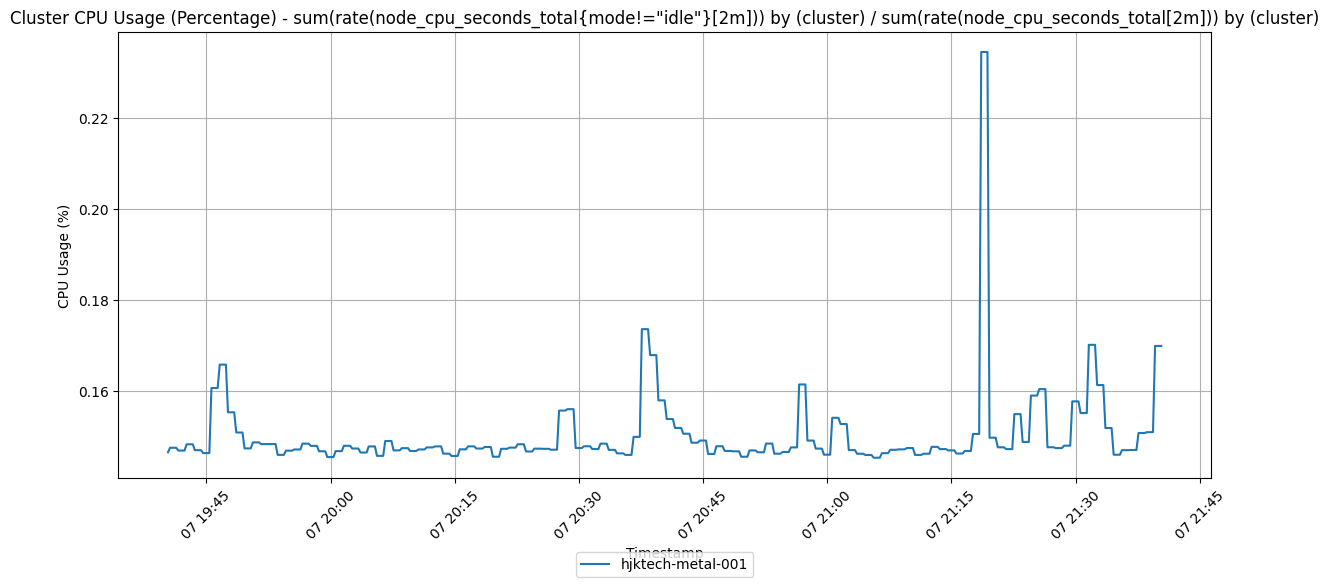

In [1]:
from opsmate.tools.knowledge_retrieval import KnowledgeRetrieval
from opsmate.knowledgestore.models import aconn, Category, init_table
from opsmate.tools.prom import PromQL, prometheus_query

import os

# await init_table()

dbconn = await aconn()

table = await dbconn.open_table("knowledge_store")

async def prom_graph(query: str):
    query = await prometheus_query(query, context={
        "llm_summary": False,
        "top_n": 20,
    })

    print(query)

    await query.run(context={
        "prometheus_endpoint": "https://prometheus-prod-01-eu-west-0.grafana.net/api/prom",
        "prometheus_user_id": os.getenv("GRAFANA_USER_ID"),
        "prometheus_api_key": os.getenv("GRAFANA_API_KEY"),
    })

    query.time_series()


await prom_graph("""
    cpu usage of the cluster over the past 2 hour, use 2m as the rate interval
""")